In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest, proportions_chisquare
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import expon
from IPython.display import display, Latex
import statistics
from collections import Counter 

# генерация

In [19]:
data_expon = expon.rvs(scale=1,loc=0,size=1000)
data_exponnonsort=data_expon

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

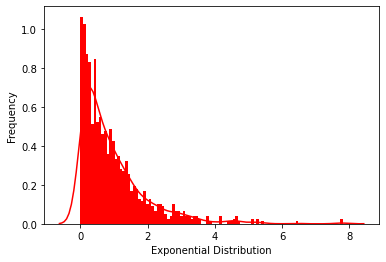

In [20]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')


# пункт а

# Вариационный ряд

In [21]:
data_expon.sort()
data_expon

array([4.26417308e-04, 1.40860178e-03, 2.31446121e-03, 2.66337225e-03,
       8.16741487e-03, 8.72386721e-03, 8.73962893e-03, 9.76561307e-03,
       1.01697956e-02, 1.11417444e-02, 1.22932426e-02, 1.28659850e-02,
       1.39423429e-02, 1.44447046e-02, 1.47220554e-02, 1.73843204e-02,
       1.75149643e-02, 1.76679183e-02, 2.34826902e-02, 2.42957813e-02,
       2.46671245e-02, 2.48416189e-02, 2.50281869e-02, 2.59455168e-02,
       2.67410295e-02, 2.71252125e-02, 2.74838536e-02, 2.83048238e-02,
       2.85107811e-02, 2.86185704e-02, 2.86665032e-02, 2.88868367e-02,
       2.94484123e-02, 2.97350441e-02, 3.00655085e-02, 3.21042568e-02,
       3.27731278e-02, 3.43624370e-02, 3.51267519e-02, 3.57352271e-02,
       3.66744323e-02, 3.77685059e-02, 3.80271541e-02, 3.80346178e-02,
       3.82996602e-02, 3.89959953e-02, 4.02259089e-02, 4.04773963e-02,
       4.25920285e-02, 4.38090361e-02, 4.39188774e-02, 4.49258700e-02,
       4.50385969e-02, 4.60070856e-02, 4.72105504e-02, 4.74331164e-02,
      

In [22]:
statistics.median(data_expon) #медиана(центр вариационного) 

0.6557592595714272

In [23]:
#мода
c = Counter(data_expon)
c.most_common() 

[(0.0004264173083961623, 1),
 (0.0014086017831722298, 1),
 (0.0023144612090477976, 1),
 (0.0026633722467374445, 1),
 (0.008167414872308262, 1),
 (0.008723867213834235, 1),
 (0.008739628934041467, 1),
 (0.009765613068903577, 1),
 (0.010169795637497724, 1),
 (0.011141744396669916, 1),
 (0.012293242644969685, 1),
 (0.012865985041951281, 1),
 (0.013942342858514182, 1),
 (0.014444704631555364, 1),
 (0.014722055423789966, 1),
 (0.01738432042153708, 1),
 (0.017514964310122765, 1),
 (0.017667918345673314, 1),
 (0.023482690221376872, 1),
 (0.024295781278105496, 1),
 (0.024667124536764194, 1),
 (0.02484161893656095, 1),
 (0.025028186908532583, 1),
 (0.025945516824017318, 1),
 (0.0267410294599727, 1),
 (0.027125212521260923, 1),
 (0.02748385356166709, 1),
 (0.02830482381000895, 1),
 (0.028510781132037366, 1),
 (0.028618570396024348, 1),
 (0.028666503164362988, 1),
 (0.0288868367474012, 1),
 (0.029448412301490968, 1),
 (0.02973504414542062, 1),
 (0.030065508500369327, 1),
 (0.0321042567982699, 1),

In [24]:
#размах
data_expon[-1]-data_expon[0] # большой-маленький

7.80644943281067

In [25]:
#коэф ассимитрии
from scipy.stats import skew
skew(data_expon)

2.2141348947251682

# пункт б

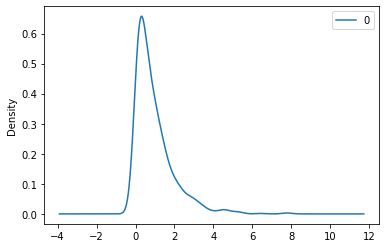

In [26]:
df = pd.DataFrame(data_expon)
df.plot.kde()

 number of bins: 2.0


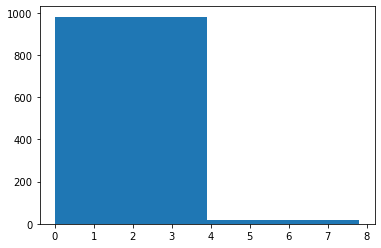

In [27]:
q25, q75 = np.percentile(data_expon, [25, 75])
bin_width =  1+math.log2(len(data_expon))#2 * (q75 - q25) * len(data_expon) ** (-1/3)
bins = round((data_expon.max() - data_expon.min()) / bin_width)+1
print(" number of bins:", bins)
plt.hist(data_expon,bins=int(bins))
plt.show()
#наш метод

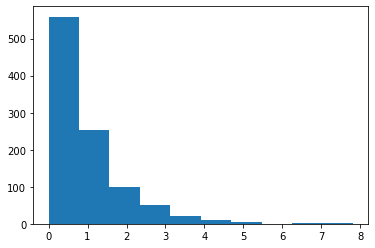

In [28]:
plt.hist(data_expon,)
plt.show()
#не наш

In [29]:
xm=1/len(data_expon)*sum(data_expon)
S2=1/len(data_expon)*sum((i-xm)**2 for i in data_expon)
S=math.sqrt(S2)
h=2.344*S/10**(0.2)
print('S2 =',S2)
print('S = ',S)
print('h = ',h)
#q((x-x_min)/h)=3/4(1-((x-x_min)/h)^2)

S2 = 0.9900356997789794
S =  0.995005376758829
h =  1.471577147417093


# пункт д 
## плотность арифметического элемента выборки

In [30]:
def randsampl(sample):
    rand=[]
    for i in range(len(sample)):
        rand.append(random.choice(sample))
    return rand

In [31]:
#оцениваем среднее арифметическое элементов выборки
r=[]
sk=[]
for i in range(10000):
    r=randsampl(data_exponnonsort)
    sk.append(statistics.mean(r))
    r=[]
print(sum(sk)/len(sk))

0.9561018502857649


In [33]:
statistics.mean(data_exponnonsort)

0.9558231964643266

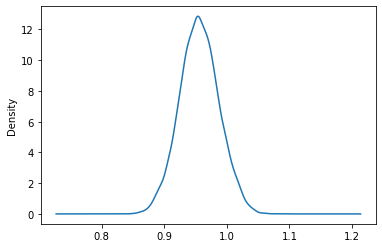

In [32]:
#бустраповская оценка плотности распределенияvсреднего арифметического элементов выборки
s = pd.Series(sk)
s.plot.kde()

# пункт е 
# бутстраповская оценка плотоности распределения коэффицента ассиметрии

In [118]:
def randsampl(sample):
    rand=[]
    for i in range(len(sample)):
        rand.append(random.choice(sample))
    return rand

In [124]:
#оцениваем коэффицент ассиметрии
from scipy.stats import skew
r=[]
sk=[]
for i in range(10000):
    r=randsampl(data_exponnonsort)
    sk.append(skew(r))
    r=[]
print(sum(sk)/len(sk))

1.814313116233072


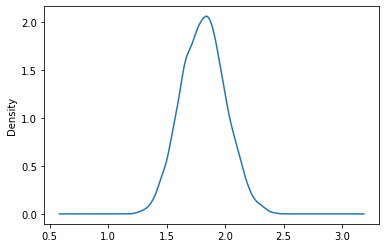

In [125]:
#бустраповская оценка плотности распределения коэффицента ассиметрии
s = pd.Series(sk)
s.plot.kde()